In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import statsmodels.api as sm
from sklearn import metrics
from sklearn.preprocessing import scale
import matplotlib.font_manager as fm
for f in fm.fontManager.ttflist:
    if 'NanumBarunGothic' in f.fname:
        plt.rcParams['font.family'] = 'NanumBarunGothic' # 폰트를 나눔고딕으로
print(plt.rcParams['font.family'])
matplotlib.rcParams['axes.unicode_minus'] = False #'-'기호 제대로 나오게함

['NanumBarunGothic']


In [2]:
df_breast = pd.read_csv("../data/cancer.csv",engine = 'python')

In [3]:
df_breast.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_breast.shape # 31 개의 변수가 있다. lable을 제외하면 x_feature 수는 30개

(569, 31)

In [5]:
# feature names
col = df_breast.columns
print(col)

Index(['diagnosis', 'mean radius', 'mean texture', 'mean perimeter',
       'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


In [6]:
df_breast.corr().round(3) # 변수간의 상관분석


,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
diagnosis,1.000,-0.730,-0.415,-0.743,-0.709,-0.359,-0.597,-0.696,-0.777,-0.330,...,-0.776,-0.457,-0.783,-0.734,-0.421,-0.591,-0.660,-0.794,-0.416,-0.324
mean radius,-0.730,1.000,0.324,0.998,0.987,0.171,0.506,0.677,0.823,0.148,...,0.970,0.297,0.965,0.941,0.120,0.413,0.527,0.744,0.164,0.007
mean texture,-0.415,0.324,1.000,0.330,0.321,-0.023,0.237,0.302,0.293,0.071,...,0.353,0.912,0.358,0.344,0.078,0.278,0.301,0.295,0.105,0.119
mean perimeter,-0.743,0.998,0.330,1.000,0.987,0.207,0.557,0.716,0.851,0.183,...,0.969,0.303,0.970,0.942,0.151,0.456,0.564,0.771,0.189,0.051
mean area,-0.709,0.987,0.321,0.987,1.000,0.177,0.499,0.686,0.823,0.151,...,0.963,0.287,0.959,0.959,0.124,0.390,0.513,0.722,0.144,0.004
mean smoothness,-0.359,0.171,-0.023,0.207,0.177,1.000,0.659,0.522,0.554,0.558,...,0.213,0.036,0.239,0.207,0.805,0.472,0.435,0.503,0.394,0.499
mean compactness,-0.597,0.506,0.237,0.557,0.499,0.659,1.000,0.883,0.831,0.603,...,0.535,0.248,0.590,0.510,0.566,0.866,0.816,0.816,0.510,0.687
mean concavity,-0.696,0.677,0.302,0.716,0.686,0.522,0.883,1.000,0.921,0.501,...,0.688,0.300,0.730,0.676,0.449,0.755,0.884,0.861,0.409,0.515
mean concave points,-0.777,0.823,0.293,0.851,0.823,0.554,0.831,0.921,1.000,0.462,...,0.830,0.293,0.856,0.810,0.453,0.667,0.752,0.910,0.376,0.369
mean symmetry,-0.330,0.148,0.071,0.183,0.151,0.558,0.603,0.501,0.462,1.000,...,0.186,0.091,0.219,0.177,0.427,0.473,0.434,0.430,0.700,0.438


<h3>Heatmap<h3>

Standardzation 하기전 heatmap

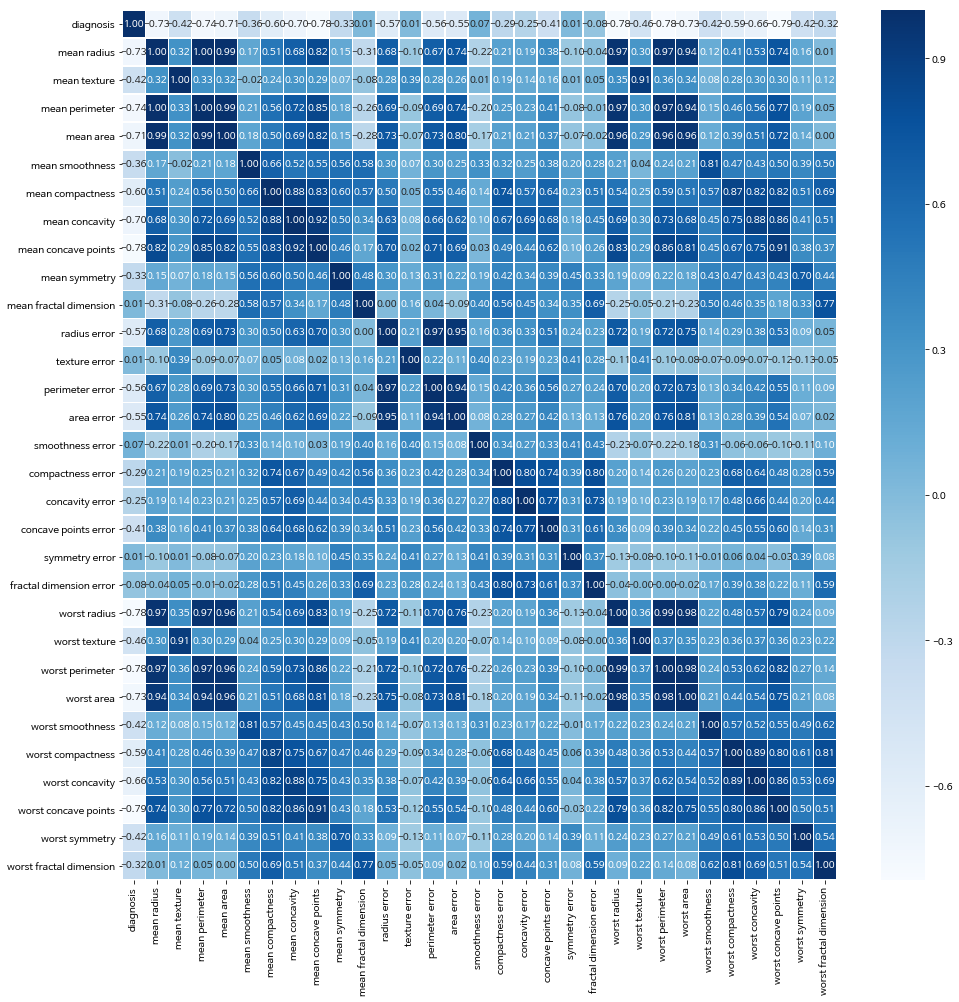

In [7]:
plt.figure(figsize= (16,16))
sns.heatmap(df_breast.corr(),annot= True, fmt = ".2f",linewidths =.5,cmap ='Blues' )

diagnosis와 상관도가 높은 변수들을 골라, heatmap를 그려보자

In [8]:
select_feature = df_breast[["diagnosis","mean radius","mean perimeter","mean area","worst radius","worst perimeter","worst area","mean concavity","mean concave points","worst concavity","worst concave points"]]
select_feature

,diagnosis,mean radius,mean perimeter,mean area,worst radius,worst perimeter,worst area,mean concavity,mean concave points,worst concavity,worst concave points
0,0,17.990,122.80,1001.0,25.380,184.60,2019.0,0.300100,0.147100,0.71190,0.26540
1,0,20.570,132.90,1326.0,24.990,158.80,1956.0,0.086900,0.070170,0.24160,0.18600
2,0,19.690,130.00,1203.0,23.570,152.50,1709.0,0.197400,0.127900,0.45040,0.24300
3,0,11.420,77.58,386.1,14.910,98.87,567.7,0.241400,0.105200,0.68690,0.25750
4,0,20.290,135.10,1297.0,22.540,152.20,1575.0,0.198000,0.104300,0.40000,0.16250
5,0,12.450,82.57,477.1,15.470,103.40,741.6,0.157800,0.080890,0.53550,0.17410
6,0,18.250,119.60,1040.0,22.880,153.20,1606.0,0.112700,0.074000,0.37840,0.19320
7,0,13.710,90.20,577.9,17.060,110.60,897.0,0.093660,0.059850,0.26780,0.15560
8,0,13.000,87.50,519.8,15.490,106.20,739.3,0.185900,0.093530,0.53900,0.20600
9,0,12.460,83.97,475.9,15.090,97.65,711.4,0.227300,0.085430,1.10500,0.22100


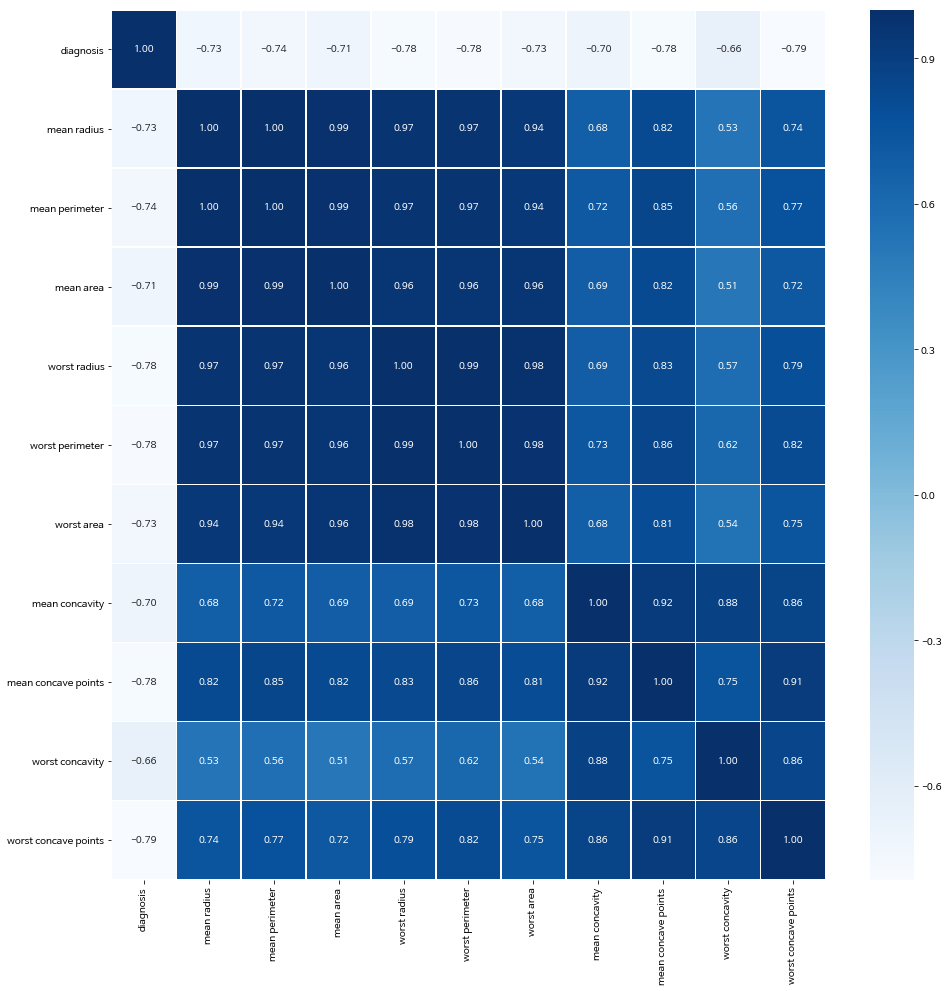

In [9]:
plt.figure(figsize= (16,16))
sns.heatmap(select_feature.corr(),annot= True, fmt = ".2f",linewidths =.5,cmap ='Blues' )

In [10]:
# 변수간의 평균의 차이가 많이 존재하므로, 표준화가 필요하다.

In [11]:
# label data , x includes our features
y_label = df_breast.diagnosis
x = df_breast.drop("diagnosis",axis = 1)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


number of benign(양성):  357
number of malignant(음성):  212


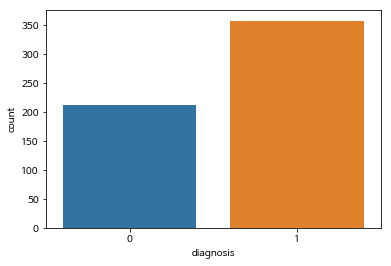

In [12]:
ax = sns.countplot(y_label,label = "Count")
B,M= y_label.value_counts()
print("number of benign(양성): ",B)
print("number of malignant(음성): ",M)

features마다 max값이 너무 상이하여, 시각화, 변수선택, 분류 등의 
분석을 하기전에 표준화 또는 normalization을 해야한다.
mean radius 의 max = 2501 이지만,mean smoothness의 max = 0.163400이므로 차이가 상대하다.

In [13]:
x.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


<h2> Visualization <h2>

표준화

In [14]:
data_dia = y_label
data = x
stand_data = (data - data.mean())/(data.std())
# 실제값에서 평균을 빼고 표준편차로 나눈다. 

In [15]:
select_data = data[["mean radius","worst radius","mean perimeter","worst perimeter","mean area","worst area","mean concavity","worst concavity","mean concave points","worst concave points"]]
select_data.shape

(569, 10)

In [16]:
select_f = select_data.columns
select_f

Index(['mean radius', 'worst radius', 'mean perimeter', 'worst perimeter',
       'mean area', 'worst area', 'mean concavity', 'worst concavity',
       'mean concave points', 'worst concave points'],
      dtype='object')

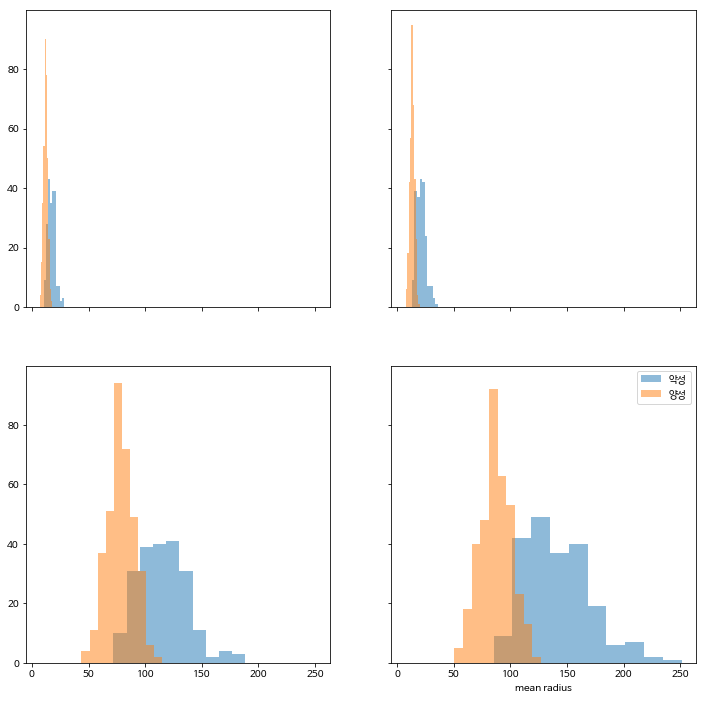

In [17]:
fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize= (12,12),)

plt.xlabel("mean radius")
axs[0,0].hist(df_breast[df_breast["diagnosis"]==0][select_f[0]],label = "악성",alpha = 0.5)
axs[0,0].hist(df_breast[df_breast["diagnosis"]==1][select_f[0]],label = "양성",alpha = 0.5)

axs[0,1].hist(df_breast[df_breast["diagnosis"]==0][select_f[1]],label = "악성",alpha = 0.5)
axs[0,1].hist(df_breast[df_breast["diagnosis"]==1][select_f[1]],label = "양성",alpha = 0.5)

axs[1,0].hist(df_breast[df_breast["diagnosis"]==0][select_f[2]],label = "악성",alpha = 0.5)
axs[1,0].hist(df_breast[df_breast["diagnosis"]==1][select_f[2]],label = "양성",alpha = 0.5)

axs[1,1].hist(df_breast[df_breast["diagnosis"]==0][select_f[3]],label = "악성",alpha = 0.5)
axs[1,1].hist(df_breast[df_breast["diagnosis"]==1][select_f[3]],label = "양성",alpha = 0.5)
plt.legend()
plt.show()



(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

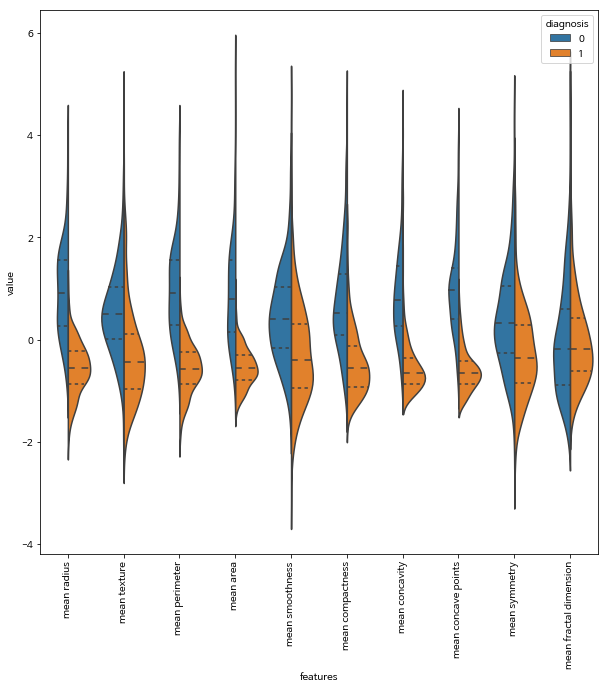

In [18]:
# standardization
# 10개의 features 
data = pd.concat([y_label,stand_data.iloc[:,0:10]],axis = 1)
# print(data) # data의 표준화 확인
data = pd.melt(data,id_vars = 'diagnosis',var_name = 'features',value_name = 'value')
# print(data) # id_var를 'diagnosis'로 하고, var_name은 diagnosis 를 제외한 column들이 들어간다.
plt.figure(figsize = (10,10))
sns.violinplot(x= "features",y = "value",hue = "diagnosis", data = data , split = True, inner = "quart")
plt.xticks(rotation = 90)
# violin plot은  실제 분포의 형태를 도형으로 표현하여 직관적으로 분포의 특징을 알아볼수있다.
# 즉, 가로축 범위에 따른 hist를 세로로 보는 느낌

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

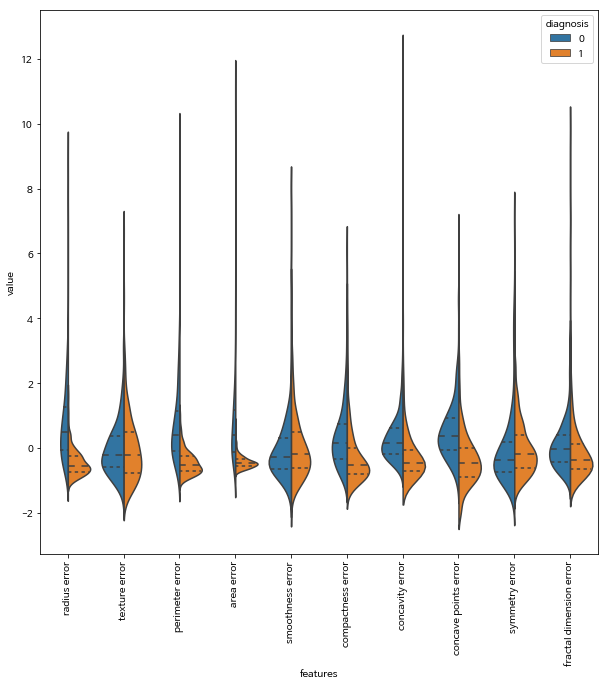

In [19]:
# 두 번째 10개의 features
data = pd.concat([y_label,stand_data.iloc[:,10:20]],axis = 1)
# print(data) # data의 표준화 확인
data = pd.melt(data,id_vars = 'diagnosis',var_name = 'features',value_name = 'value')
# print(data) # id_var를 'diagnosis'로 하고, var_name은 diagnosis 를 제외한 column들이 들어간다.
plt.figure(figsize = (10,10))
sns.violinplot(x= "features",y = "value",hue = "diagnosis", data = data , split = True, inner = "quart")
plt.xticks(rotation = 90)
# 처음 10개의 변수들과 비교했을 때, 분포크기의 차이가존재한다.
# diagnosis와 상관도와 연관이 있는것일까???


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

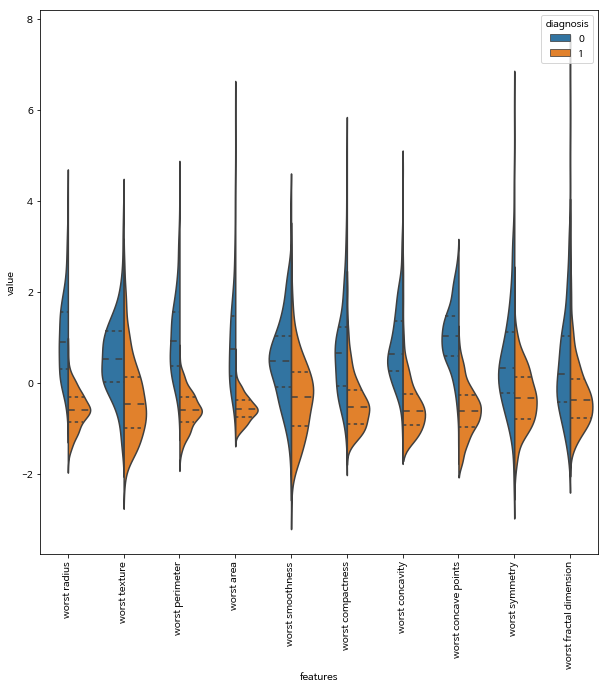

In [20]:
# 세 번째 10개의 features
data = pd.concat([y_label,stand_data.iloc[:,20:30]],axis = 1)
# print(data) # data의 표준화 확인
data = pd.melt(data,id_vars = 'diagnosis',var_name = 'features',value_name = 'value')
# print(data) # id_var를 'diagnosis'로 하고, var_name은 diagnosis 를 제외한 column들이 들어간다.
plt.figure(figsize = (10,10))
sns.violinplot(x= "features",y = "value",hue = "diagnosis", data = data , split = True, inner = "quart")
plt.xticks(rotation = 90)

Histgram으로 diagnosis (양성,음성)과의 분포도 살펴보자

<h2>Box plot<h2>

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

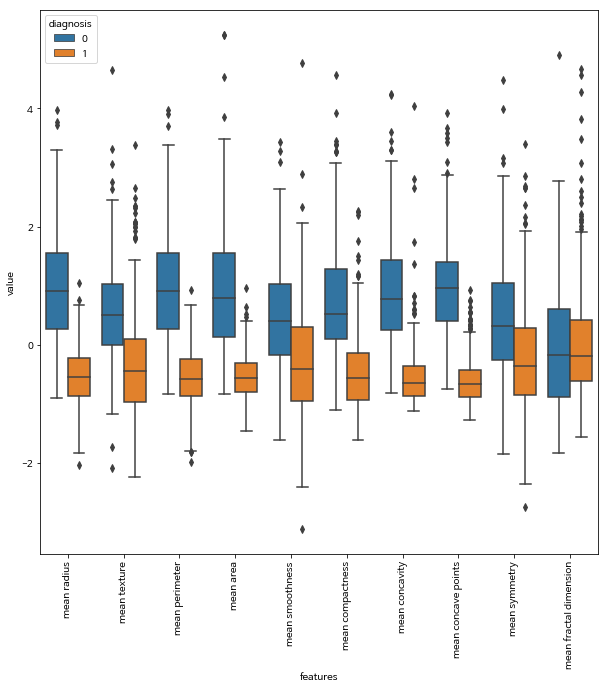

In [21]:
# box plots은 아웃라이어(이상치)를 발견하는데 유용하게 쓰인다.
# 10개의 데이터(stand_data)
data = pd.concat([y_label,stand_data.iloc[:,0:10]],axis = 1)
# print(data) # data의 표준화 확인
data = pd.melt(data,id_vars = 'diagnosis',var_name = 'features',value_name = 'value')
plt.figure(figsize = (10,10))
sns.boxplot(x = "features", y = "value",hue = "diagnosis" , data = data)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

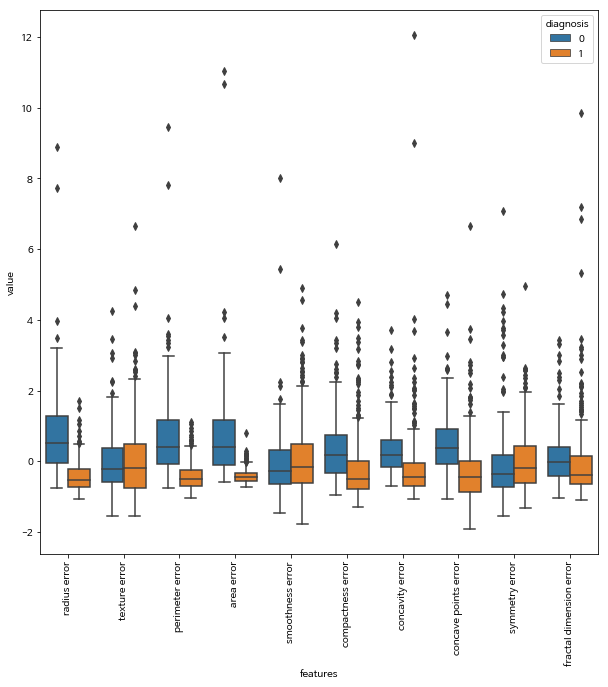

In [22]:
# box plots은 아웃라이어(이상치)를 발견하는데 유용하게 쓰인다.
# 다음 10개의 데이터(stand_data)
data = pd.concat([y_label,stand_data.iloc[:,10:20]],axis = 1)
# print(data) # data의 표준화 확인
data = pd.melt(data,id_vars = 'diagnosis',var_name = 'features',value_name = 'value')
plt.figure(figsize = (10,10))
sns.boxplot(x = "features", y = "value",hue = "diagnosis" , data = data)
plt.xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

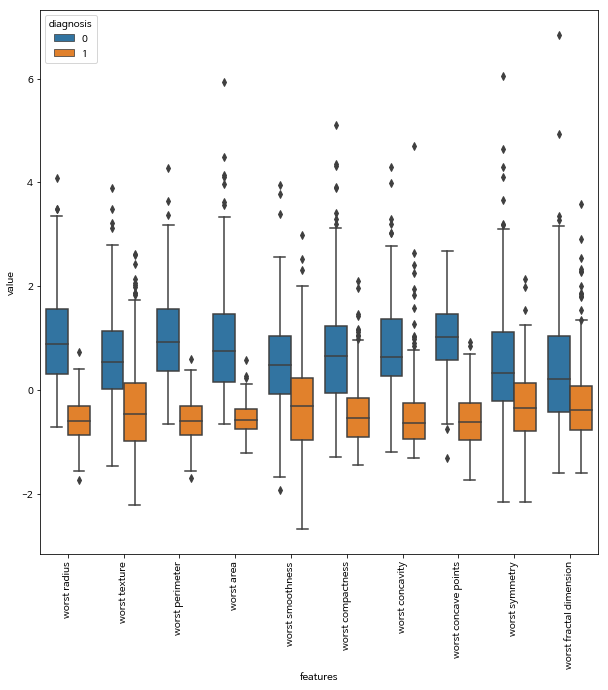

In [23]:
# box plots은 아웃라이어(이상치)를 발견하는데 유용하게 쓰인다.
# 마지막 10개의 데이터(stand_data)
data = pd.concat([y_label,stand_data.iloc[:,20:30]],axis = 1)
# print(data) # data의 표준화 확인
data = pd.melt(data,id_vars = 'diagnosis',var_name = 'features',value_name = 'value')
plt.figure(figsize = (10,10))
sns.boxplot(x = "features", y = "value",hue = "diagnosis" , data = data)
plt.xticks(rotation = 90)

이상치 처리

Lets interpret one more thing about plot above, variable of concavity_worst and concave point_worst 
looks like similar but how can we decide whether they are correlated with each other or not.
(Not always true but, basically if the features are correlated with each other we can drop one of them)

In [24]:
# 2가지의 변수를 깊게 살펴보려면 joint plot을 이용하자, 이 그래프를 사용하면 두 변수 
# 사이가 어떻게 연관 되어있는지 자세하게 보인다. 피어슨계수가 1에 가까울 수록 높은 연관성을 가진다.
# 다중공정성의심


/home/pirl/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


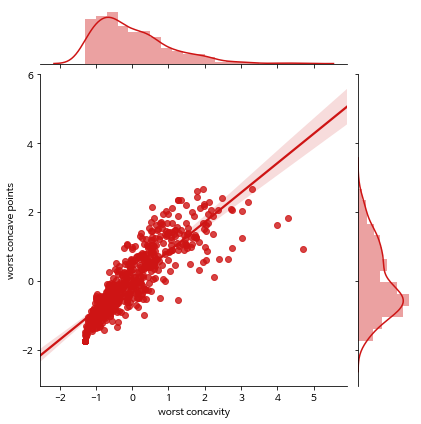

In [25]:
sns.jointplot(stand_data.loc[:,'worst concavity'], stand_data.loc[:,'worst concave points'], kind="regg", color="#ce1414")

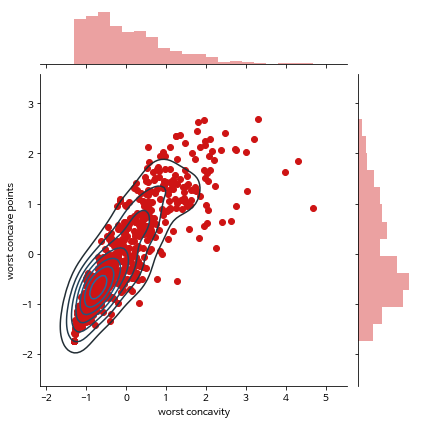

In [26]:
g = (sns.jointplot(stand_data.loc[:,'worst concavity'], stand_data.loc[:,'worst concave points'], color="#ce1414")).plot_joint(sns.kdeplot, zorder = 1, n_levels =8)
# zorder = 선굵기, n_level = 깊이

In [27]:
# worst concavity 와 worst concave points는 pearsonr계수가 0.85이므로 아주 높은 연관성
# 을 가지고 있다. 두 변수 이외에 다른 변수간에도 높은 연관성을 가진 변수들은 다중공정성이
# 높을 수 있다 따라서, 이후 다중공정성이 높은 변수들은 제거하든, 처리가 필요하다.
pearsonr,pval = stats.pearsonr(stand_data.loc[:,'worst concavity'], stand_data.loc[:,'worst concave points'])
print("pearsonr = {}, pvalue = {}".format(pearsonr,pval))

pearsonr = 0.8554338603439992, pvalue = 3.764097729696229e-164


<h2>correlation map<h2>

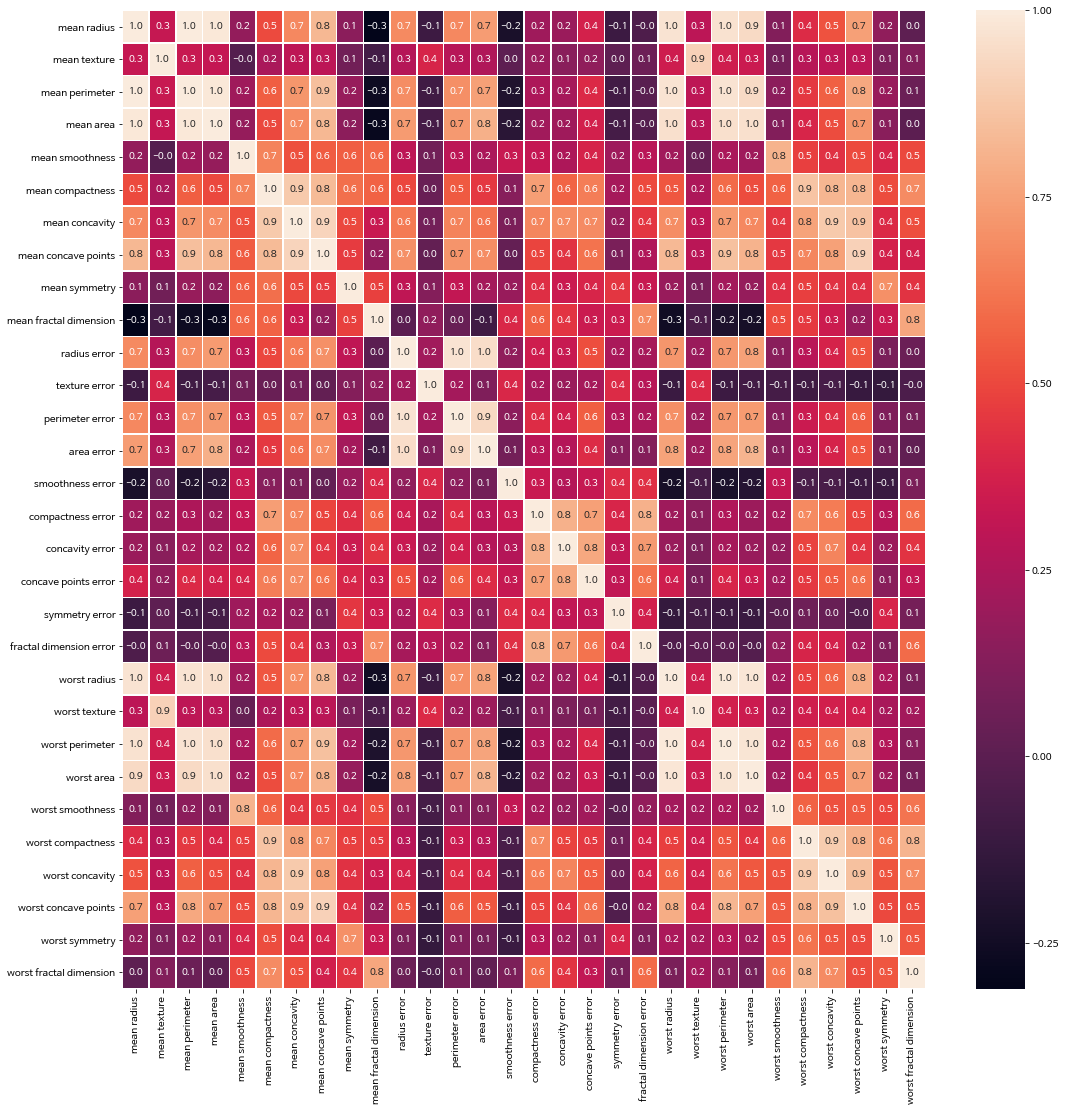

In [28]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(stand_data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [29]:
# 아래의 상관도를 보면, 상당히 높은 연관수치를 가진 변수들이 있다.
# 따라서, 모델을 적용하기전에, 변수를 걸러내야한다.
# select_feature = select_feature.drop('diagnosis',axis = 1)
select_feature["radius error"] = df_breast["radius error"]
select_feature["perimeter error"] = df_breast["perimeter error"]
select_feature["area error"] = df_breast["area error"]

select_feature2 = stand_data[select_feature.columns]
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(select_feature2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

KeyError: "Index(['diagnosis'], dtype='object') not in index"

In [ ]:
drop_list = ['mean perimeter','mean radius','mean compactness','mean concave points','perimeter error','worst radius','worst perimeter','worst compactness','worst concave points','compactness error','concave points error','worst texture','worst area']
x= stand_data.drop(drop_list,axis = 1 )        # do not modify x, we will use it later 
x.head()

In [30]:
drop_list2 = ['mean area','mean perimeter','mean compactness','mean concave points','radius error','perimeter error','worst radius','worst perimeter','worst compactness','worst concave points','compactness error','concave points error','worst texture','worst area']
x2 = stand_data.drop(drop_list2,axis = 1 )        # do not modify x, we will use it later 
x2.head()

,mean radius,mean texture,mean smoothness,mean concavity,mean symmetry,mean fractal dimension,texture error,area error,smoothness error,concavity error,symmetry error,fractal dimension error,worst smoothness,worst concavity,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.567087,2.650542,2.215566,2.253764,-0.564768,2.485391,-0.213814,0.723390,1.147747,0.906286,1.306537,2.107672,2.748204,1.935312
1,1.828212,-0.353322,-0.826235,-0.023825,0.001391,-0.867889,-0.875473,0.741749,-0.604819,-0.440393,-0.804742,-0.099356,-0.375282,-0.146620,-0.243675,0.280943
2,1.578499,0.455786,0.941382,1.362280,0.938859,-0.397658,-0.779398,1.180298,-0.296744,0.212889,0.236827,0.293301,0.526944,0.854222,1.151242,0.201214
3,-0.768233,0.253509,3.280667,1.914213,2.864862,4.906602,-0.110312,-0.288125,0.689095,0.818798,4.728520,2.045711,3.391291,1.987839,6.040726,4.930672
4,1.748758,-1.150804,0.280125,1.369806,-0.009552,-0.561956,-0.789549,1.189310,1.481763,0.827742,-0.360775,0.498889,0.220362,0.612640,-0.867590,-0.396751


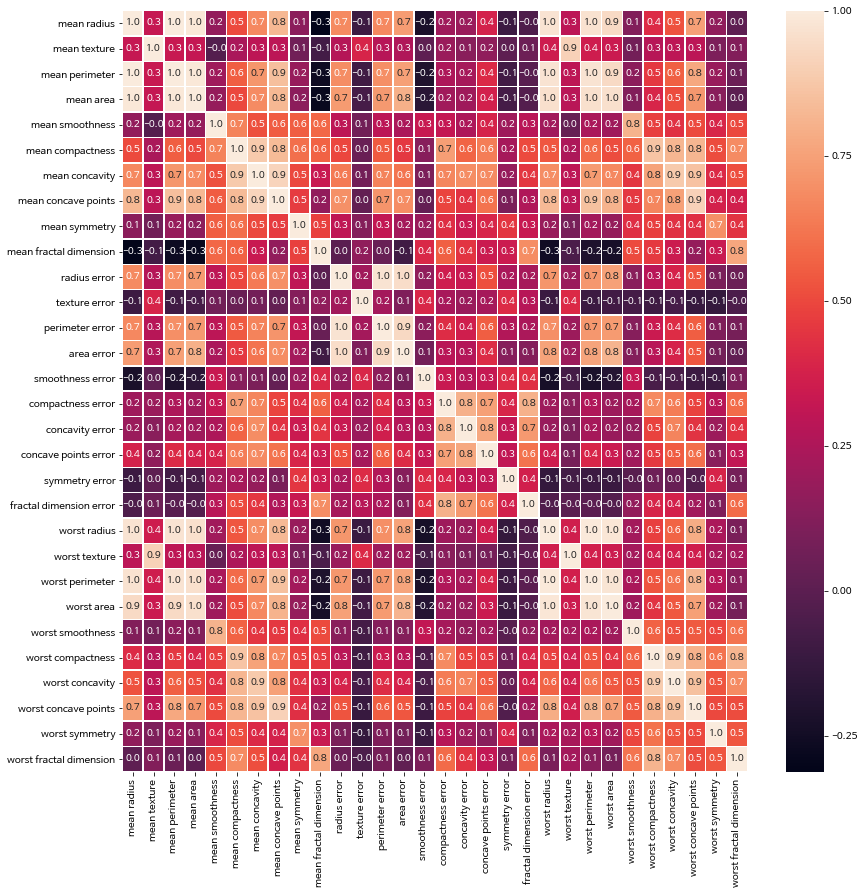

In [31]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [32]:
df_b2 = pd.concat([y_label,x],axis =1)
df_b2

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,0,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,0,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,0,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,0,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,0,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,0,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,0,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,0,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,0,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


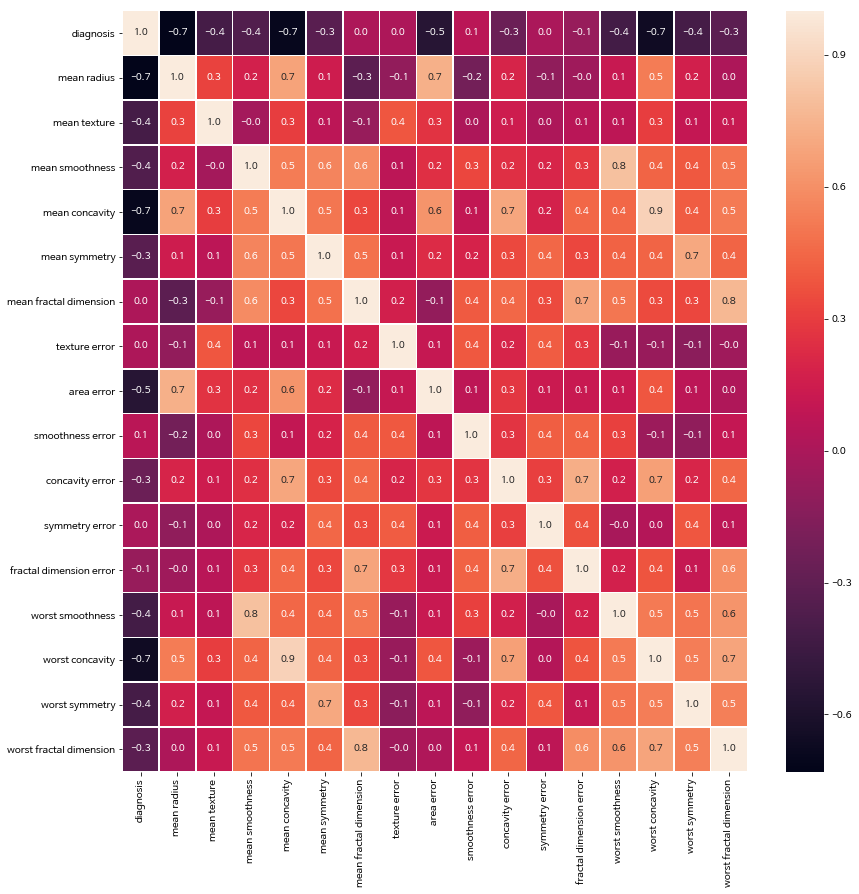

In [33]:
df_b3 = pd.concat([y_label,x2],axis=1)
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_b3.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

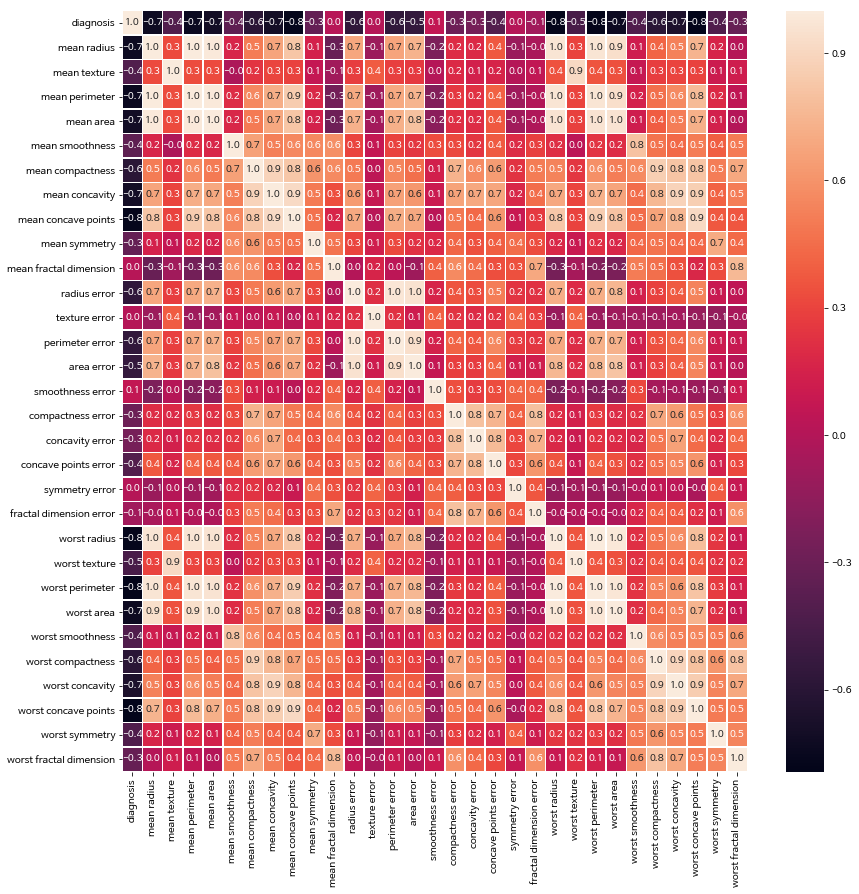

In [34]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_b2.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,StratifiedKFold
from sklearn.tree import export_graphviz
import graphviz
x_data= x
y_data= y_label
x_tr,x_test,y_tr,y_test = train_test_split(x_data,y_data,test_size=0.3,random_state = 42)

tree_uncustomized = DecisionTreeClassifier(random_state = 1234)
tree_uncustomized.fit(x_tr,y_tr)

print("train 정확도 : {:.3f}".format(tree_uncustomized.score(x_tr,y_tr)))
print("test 정확도 : {:.3f}".format(tree_uncustomized.score(x_test,y_test)))

train 정확도 : 1.000
test 정확도 : 0.918


In [36]:
params_grid = {'max_depth': [i for i in range(1,10)],
             'min_samples_leaf' : [i*10 for i in range(1,10)],
             'criterion' : ['gini','entropy']}
#               'min_samples_split':[0.1,0.2,0.3]}

# cross_validation = StratifiedKFold(y_tr,shuffle = True)
grid_search = GridSearchCV(tree_uncustomized, param_grid = params_grid)
grid_search.fit(x_tr,y_tr)

print("Best Score : {}".format(grid_search.best_score_))
print("Best params : {}".format(grid_search.best_params_))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Best Score : 0.9296482412060302
Best params : {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 10}


In [37]:
from sklearn.metrics import accuracy_score
# 최적의 파라미터 : Best params : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 10}

best_dt_model = DecisionTreeClassifier(max_depth=2,min_samples_leaf=10,criterion = 'gini')
best_dt_model.fit(x_tr,y_tr)

y_pred = best_dt_model.predict(x_test)

print(accuracy_score(y_test,y_pred))
# 97%의 정확도를 얻었다.


0.9298245614035088


<h2>Decision Tree graph<h2>

In [38]:
import os

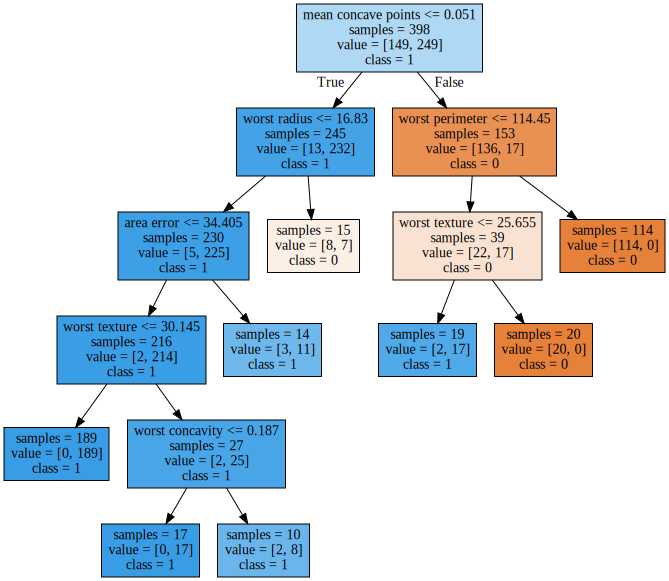

In [39]:
tree = DecisionTreeClassifier(criterion="entropy",max_depth=5, min_samples_leaf = 10,random_state=1234)

tree.fit(x_tr,y_tr)

export_graphviz(tree,out_file="tree.dot",class_names=["0","1"],feature_names=x_tr.columns,impurity = False, filled = True)

# # graphviz2.38 다운받는 경로
os.environ["PATH"] += os.pathsep + "./"

with open("tree.dot") as f:
   dot_graph = f.read()
display(graphviz.Source(dot_graph))

<h2>설명변수 중요도 그래프<h2>

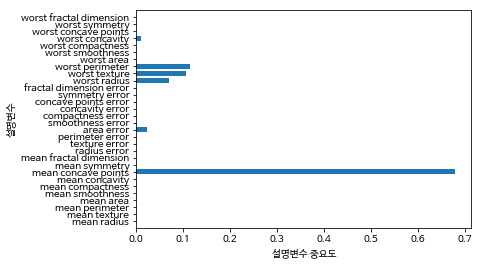

In [40]:
df_feature_importance = pd.DataFrame()
df_feature_importance["feature"] = x_tr.columns
df_feature_importance["importance"] = tree.feature_importances_
df_feature_importance.sort_values(by = "importance",ascending = False)

def plot_feature_importances(model):
    n_features = x_tr.shape[1]
    plt.barh(range(n_features),model.feature_importances_,align = "center")
    plt.yticks(np.arange(n_features),x_tr.columns)
    plt.xlabel("설명변수 중요도")
    plt.ylabel("설명변수")
    plt.ylim(-1,n_features)
    
plot_feature_importances(tree)
    